In [1]:
!pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.5 MB 2.6 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.5 MB 2.3 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/11.5 MB 2.0 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.5 MB 2.0 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.5 MB 2.0 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.5 MB 2.0 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.5 MB 2.0 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.5 MB 2.0 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.5 MB 2.0 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.5 MB 2.0 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.5 MB 2.0 MB/s eta 0:00:06
   ----- ----

In [2]:
!pip install seaborn

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 172.2 kB/s eta 0:00:44
   -- ------------------------------------- 0.5/8.0 MB 172.2 kB/s eta 0:00:44
   -- ----------

In [3]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 2.7 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.1 MB 2.6 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.1 MB 2.2 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/11.1 MB 2.1 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/11.1 MB 2.0 MB/s eta 0:00:05
   ---------- ----------------------------- 2.9/11.1 MB 1.9 MB/s eta 0:00:05
   ----------- ---------------------------- 3.1/11.1 MB 1.9 MB/s eta 0:00:05
   ------------ --------------------------- 3.4/11.1 MB 1.9 MB/s eta 0:00:05
   -------------- ------------------------- 3.9/11.1 MB 1.8 MB/s eta 0:00:04
   --------------- ------------------------ 4.2/11.1 MB 1.8 MB/s eta 0:00:04
   --------------- ------------------------ 4.2/11.1 MB 1.8 MB/s eta 0:00:04
   ----------

In [4]:
!pip install numpy

In [5]:
#import library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

In [6]:
#import dataset
df_load = pd.read_csv("D:/Jupyter Project/churn_telco.csv")

#tampilkan bentuk dari dataset
print(df_load.shape)

#tampilkan 5 data teratas
print(df_load.head())

#tampilkan jumlah ID yang unik
print(df_load.customerID.nunique())

(7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Co

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


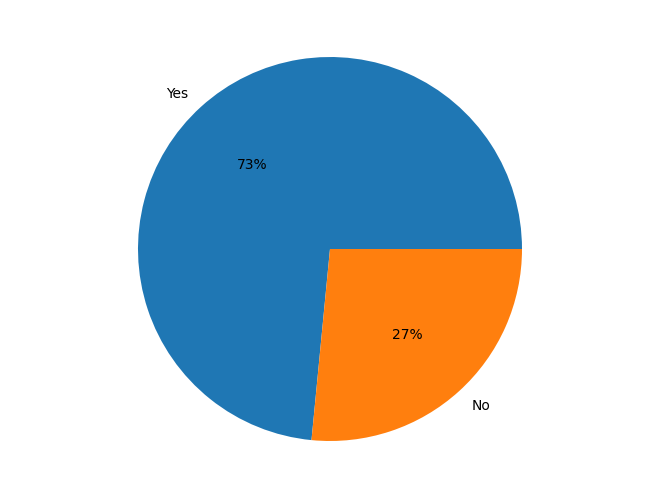

In [7]:
#memvisualisasikan presentase churn
flg = plt.figure()
ax = flg.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

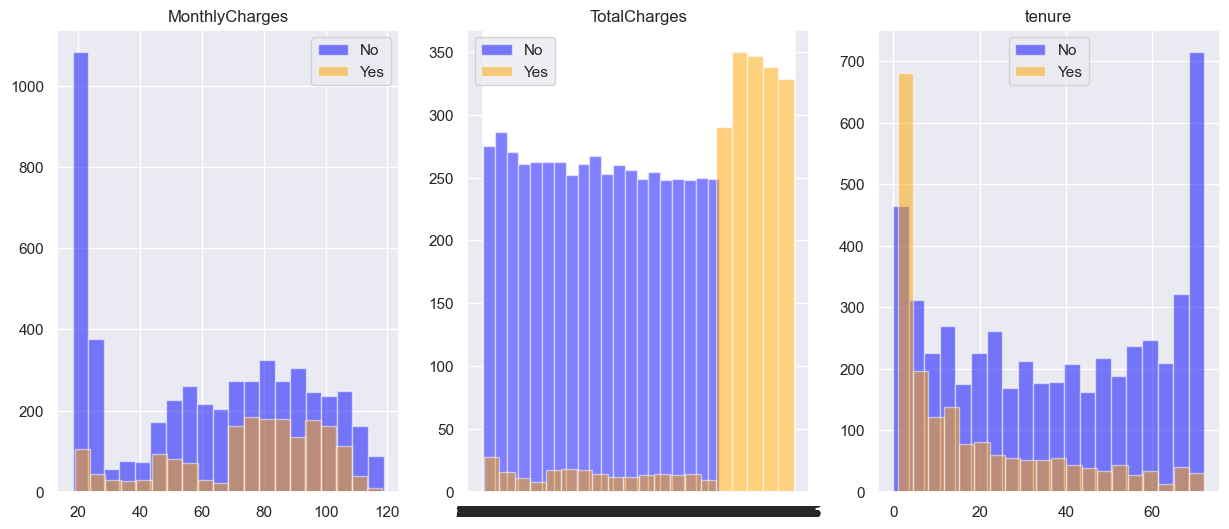

In [15]:
#creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

#use the following code to plot two overlays of histagram per each numerical_features, use a color of blue
for i, feature in enumerate(numerical_features):
    df_load[df_load["Churn"] == "No"][feature].hist(
        bins=20, color="blue", alpha=0.5, ax=ax[i], label="No"
    )
    df_load[df_load["Churn"] == "Yes"][feature].hist(
        bins=20, color="orange", alpha=0.5, ax=ax[i], label="Yes"
    )

    ax[i].set_title(feature)
    ax[i].legend()
plt.show()

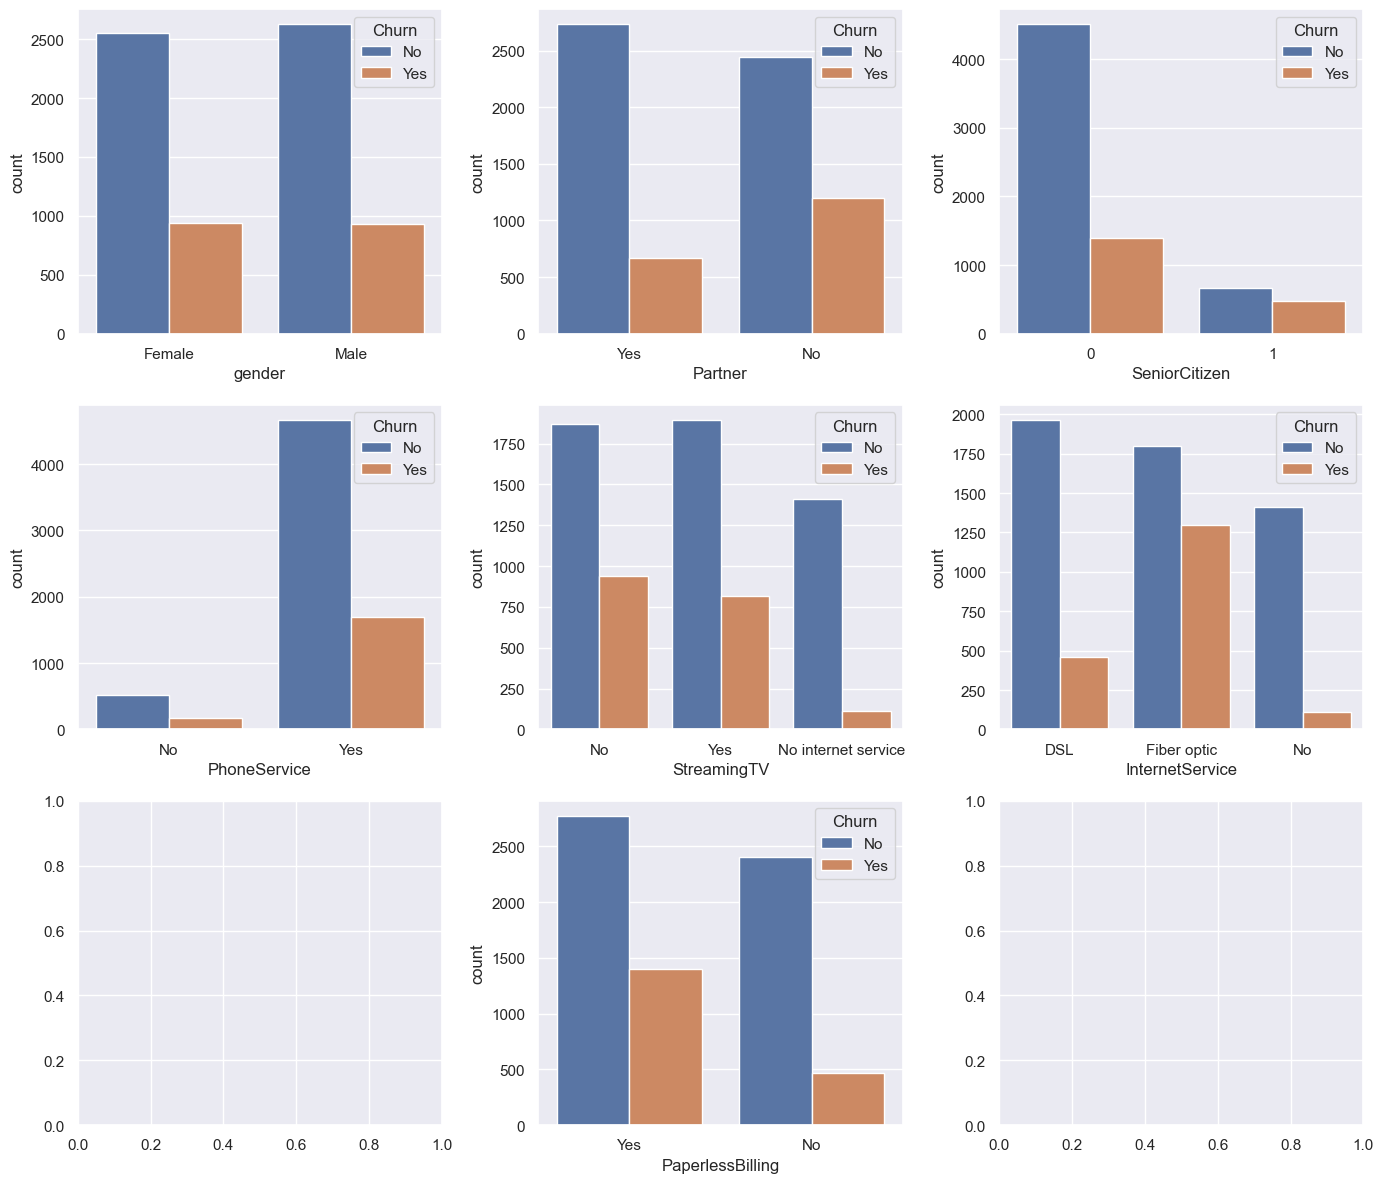

In [16]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

In [18]:
#remove the unnecessary columns customerID & UpdatedAt
cleaned_df = df_load.drop(['customerID','UpdatedAt'], errors='ignore')
print(cleaned_df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [21]:
#convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    #perform encoding for each non-numerical column
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

C:\Users\Lenka\AppData\Local\Temp\ipykernel_3356\1819831548.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
C:\Users\Lenka\AppData\Local\Temp\ipykernel_3356\1819831548.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
C:\Users\Lenka\AppData\Local\Temp\ipykernel_3356\1819831548.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
C:\Users\Lenka\AppData\Local\Temp\ipykernel_3356\1819831548.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is

        customerID       gender  SeniorCitizen      Partner   Dependents  \
count  7043.000000  7043.000000    7043.000000  7043.000000  7043.000000   
mean   3521.000000     0.504756       0.162147     0.483033     0.299588   
std    2033.283305     0.500013       0.368612     0.499748     0.458110   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%    1760.500000     0.000000       0.000000     0.000000     0.000000   
50%    3521.000000     1.000000       0.000000     0.000000     0.000000   
75%    5281.500000     1.000000       0.000000     1.000000     1.000000   
max    7042.000000     1.000000       1.000000     1.000000     1.000000   

            tenure  PhoneService  MultipleLines  InternetService  \
count  7043.000000   7043.000000    7043.000000      7043.000000   
mean     32.371149      0.903166       0.940508         0.872923   
std      24.559481      0.295752       0.948554         0.737796   
min       0.000000      0.000000       0.00

In [22]:
#predictor dan target
X = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']

#splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', X_train.shape,',sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Presentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', X_test.shape,',sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Presentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4930, 20) ,sedangkan Jumlah baris dan kolom dari y_train adalah: (4930,)
Presentase Churn di data Training adalah:
Churn
0    0.737323
1    0.262677
Name: proportion, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2113, 20) ,sedangkan Jumlah baris dan kolom dari y_test adalah: (2113,)
Presentase Churn di data Testing adalah:
Churn
0    0.728348
1    0.271652
Name: proportion, dtype: float64


In [23]:
log_model = LogisticRegression().fit(X_train, y_train)
print('Model Logistic Regression yang terbentuk adalah: \n', log_model)

C:\Users\Lenka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Logistic Regression yang terbentuk adalah: 
LogisticRegression()


In [24]:
#make prediction on the training set
y_train_pred = log_model.predict(X_train)

#classification report
print('Classification Report Training Model (Logistic Regression):\n')
print(classification_report(y_train, y_train_pred))

#confusion matrix
print('Confusion Matrix Training Model (Logistic Regression):\n')
print(confusion_matrix(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression):

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      3635
           1       0.63      0.54      0.58      1295

    accuracy                           0.80      4930
   macro avg       0.74      0.71      0.72      4930
weighted avg       0.79      0.80      0.79      4930

Confusion Matrix Training Model (Logistic Regression):

[[3226  409]
 [ 595  700]]
